# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [277]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import ttest_ind
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')


In [278]:
df = pd.read_csv("data/train.csv")
df.sample(5)

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
4767,Ako ay may lobo Pinoy Kid Song Offline,FAMILY,0,9.7M,1+,Free,0,Mature 17+,Entertainment,"July 30, 2018",3.0,2.3 and up,NaN
734,DramaFever: Stream Asian Drama Shows & Movies,ENTERTAINMENT,155234,22M,"1,000,000+",Free,0,Teen,Entertainment,"August 1, 2018",01.01.66,4.4 and up,4.2
8330,Fuel Calculator for EY,TOOLS,32,2.7M,"1,000+",Free,0,Everyone,Tools,"June 15, 2018",1.11,2.1 and up,4.7
6246,Burrito Bash – We Bare Bears,FAMILY,10776,21M,"1,000,000+",Free,0,Everyone,Arcade;Action & Adventure,"October 26, 2017",3.4,4.1 and up,4.3
7395,DW VMAX,TOOLS,843,8.5M,"100,000+",Free,0,Everyone,Tools,"May 4, 2017",3.7.1,2.2 and up,3.4


In [279]:
duplicate = df.duplicated()
duplicate.sum()



np.int64(310)

In [280]:
df = df.drop_duplicates().reset_index(drop=True)

In [281]:
duplicate = df.duplicated()
duplicate.sum()

np.int64(0)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8658 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8658 non-null   object 
 1   Category         8658 non-null   object 
 2   Reviews          8658 non-null   object 
 3   Size             8658 non-null   object 
 4   Installs         8658 non-null   object 
 5   Type             8657 non-null   object 
 6   Price            8658 non-null   object 
 7   Content Rating   8657 non-null   object 
 8   Genre            8658 non-null   object 
 9   Last Updated     8658 non-null   object 
 10  Current Version  8651 non-null   object 
 11  Android Version  8655 non-null   object 
 12  Y                7193 non-null   float64
dtypes: float64(1), object(12)
memory usage: 879.5+ KB


Reviews

In [283]:
df[~df.Reviews.str.isnumeric()]

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
8344,Life Made WI-Fi Touchscreen Photo Frame,1.9,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,19.0


In [284]:
df=df.drop(df.index[8344])
df["Reviews"] = df["Reviews"].astype(int)

Size

In [285]:
print(list(df['Size'].unique()))

['14M', '8.7M', '2.8M', '5.6M', '19M', '29M', '3.1M', '28M', '12M', '21M', '2.7M', '5.5M', '39M', '4.2M', '7.0M', '6.0M', '25M', '6.1M', '4.6M', '9.2M', '11M', '24M', 'Varies with device', '9.4M', '10M', '1.2M', '26M', '56M', '35M', '33M', '54M', '201k', '5.7M', '17M', '8.6M', '2.4M', '27M', '16M', '3.4M', '8.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '7.9M', '52M', '9.0M', '6.7M', '2.6M', '57M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '23M', '4.9M', '9.5M', '5.0M', '5.9M', '13M', '7.1M', '37M', '73M', '6.8M', '3.5M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '30M', '3.9M', '55M', '1.5M', '7.5M', '20M', '51M', '41M', '48M', '8.5M', '2.2M', '8.3M', '4.3M', '4.7M', '15M', '3.3M', '40M', '9.1M', '8.8M', '6.6M', '5.1M', '66M', '79k', '4.0M', '118k', '44M', '695k', '1.6M', '18k', '53M', '31M', '6.2M', '8.0M', '1.4M', '3.0M', '6.5M', '5.8M', '9.6M', '49M', '77M', '4.4M', '4.8M', '4.5M', '70M', '3.6M', '6.9M', '10.0M', '9.8M', '3.8M', '7.8M', '8.1M', '36M', '9.3M', '2.5M', 

In [286]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1_000  # MB to KB
    elif 'k' in size:
        return float(size.replace('k', ''))


df['Size'] = df['Size'].apply(convert_size)


In [287]:
print(list(df['Size'].unique()))

[np.float64(14000.0), np.float64(8700.0), np.float64(2800.0), np.float64(5600.0), np.float64(19000.0), np.float64(29000.0), np.float64(3100.0), np.float64(28000.0), np.float64(12000.0), np.float64(21000.0), np.float64(2700.0), np.float64(5500.0), np.float64(39000.0), np.float64(4200.0), np.float64(7000.0), np.float64(6000.0), np.float64(25000.0), np.float64(6100.0), np.float64(4600.0), np.float64(9200.0), np.float64(11000.0), np.float64(24000.0), np.float64(nan), np.float64(9400.0), np.float64(10000.0), np.float64(1200.0), np.float64(26000.0), np.float64(56000.0), np.float64(35000.0), np.float64(33000.0), np.float64(54000.0), np.float64(201.0), np.float64(5700.0), np.float64(17000.0), np.float64(8600.0), np.float64(2400.0), np.float64(27000.0), np.float64(16000.0), np.float64(3400.0), np.float64(8900.0), np.float64(2900.0), np.float64(38000.0), np.float64(32000.0), np.float64(5400.0), np.float64(18000.0), np.float64(1100.0), np.float64(7900.0), np.float64(52000.0), np.float64(9000.0), 

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8657 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8657 non-null   object 
 1   Category         8657 non-null   object 
 2   Reviews          8657 non-null   int64  
 3   Size             7399 non-null   float64
 4   Installs         8657 non-null   object 
 5   Type             8656 non-null   object 
 6   Price            8657 non-null   object 
 7   Content Rating   8657 non-null   object 
 8   Genre            8657 non-null   object 
 9   Last Updated     8657 non-null   object 
 10  Current Version  8650 non-null   object 
 11  Android Version  8655 non-null   object 
 12  Y                7192 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 946.9+ KB


In [289]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)


In [290]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)


In [291]:
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])


In [292]:
df.sample(20)

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Last Updated,Current Version,Android Version,Y
1216,Magic Tiles 3,GAME,592068,NaN,50000000,Free,0.0,Everyone,Music,"August 3, 2018",5.13.007,4.1 and up,4.5
5297,Bu Nedir ?,GAME,0,33000.0,50,Free,0.0,Everyone,Trivia,"April 15, 2018",3.1.6z,4.0.3 and up,NaN
7571,The dollar in mexico,FINANCE,4254,3200.0,100000,Free,0.0,Everyone,Finance,"August 29, 2017",2.5,4.0 and up,4.5
3134,iGun Pro -The Original Gun App,GAME,249308,55000.0,10000000,Free,0.0,Everyone,Arcade,"September 7, 2017",5.26,2.3 and up,4.2
642,IMDb Movies & TV,ENTERTAINMENT,501498,12000.0,100000000,Free,0.0,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device,4.2
1720,Brilliant Distinctions®,MEDICAL,78,72000.0,50000,Free,0.0,Everyone,Medical,"June 27, 2018",2.2.12,4.4 and up,2.8
3133,Solitaire!,GAME,403911,23000.0,10000000,Free,0.0,Everyone,Card,"June 24, 2018",2.277.0,4.1 and up,4.7
3782,AE 3D Moto 3,GAME,2588,26000.0,100000,Free,0.0,Everyone 10+,Racing,"December 31, 2014",1.7.1,2.3 and up,3.9
3587,X-ray scanner simulator,FAMILY,1616,3000.0,500000,Free,0.0,Everyone,Casual,"January 8, 2017",7.0,2.1 and up,2.7
4607,Bridge Constructor Playground FREE,FAMILY,137377,30000.0,5000000,Free,0.0,Everyone,Simulation,"April 12, 2017",2.2,4.0.3 and up,3.9


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8657 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App Name         8657 non-null   object 
 1   Category         8657 non-null   object 
 2   Reviews          8657 non-null   int64  
 3   Size             7399 non-null   float64
 4   Installs         8657 non-null   int64  
 5   Type             8656 non-null   object 
 6   Price            8657 non-null   float64
 7   Content Rating   8657 non-null   object 
 8   Genre            8657 non-null   object 
 9   Last Updated     8657 non-null   object 
 10  Current Version  8650 non-null   object 
 11  Android Version  8655 non-null   object 
 12  Y                7192 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 946.9+ KB


last updated

In [294]:
# Convert to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Feature 1: Days since last update (relative to the most recent date)
most_recent_date = df['Last Updated'].max()
df['Days_Since_Update'] = (most_recent_date - df['Last Updated']).dt.days

In [295]:
df[['Last Updated', 'Days_Since_Update']].head()

,Last Updated,Days_Since_Update
0,2018-01-15,205
1,2018-08-01,7
2,2018-06-20,49
3,2017-03-26,500
4,2018-04-26,104


In [296]:
df = df.drop('Last Updated', axis=1)


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8657 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           8657 non-null   object 
 1   Category           8657 non-null   object 
 2   Reviews            8657 non-null   int64  
 3   Size               7399 non-null   float64
 4   Installs           8657 non-null   int64  
 5   Type               8656 non-null   object 
 6   Price              8657 non-null   float64
 7   Content Rating     8657 non-null   object 
 8   Genre              8657 non-null   object 
 9   Current Version    8650 non-null   object 
 10  Android Version    8655 non-null   object 
 11  Y                  7192 non-null   float64
 12  Days_Since_Update  8657 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 946.9+ KB


In [298]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False)})
null

,Null Values
Y,1465
Size,1258
Current Version,7
Android Version,2
Type,1
App Name,0
Category,0
Reviews,0
Installs,0
Price,0


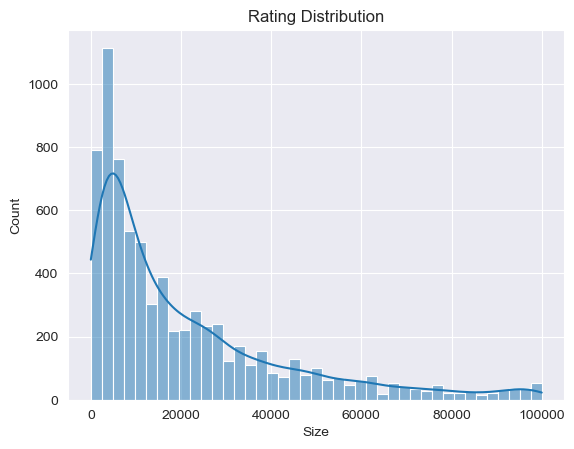

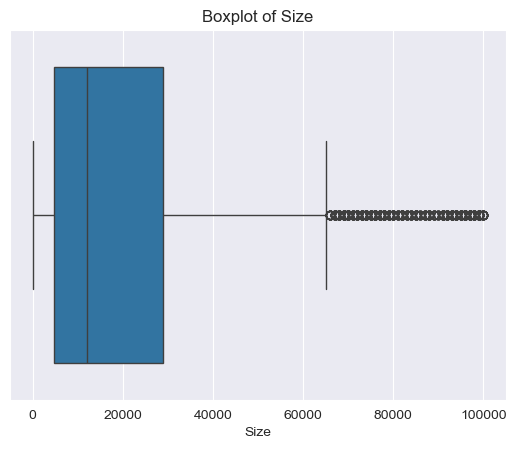

In [299]:
sns.histplot(df['Size'].dropna(), kde=True)
plt.title('Rating Distribution')
plt.show()

# Boxplot
sns.boxplot(x=df['Size'])
plt.title('Boxplot of Size')
plt.show()

as data has outliers and skewed we replace missing values median

In [300]:
df['Size'] = df['Size'].fillna(df['Size'].median())
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)


In [301]:
df.isnull().sum()

App Name                0
Category                0
Reviews                 0
Size                    0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genre                   0
Current Version         7
Android Version         2
Y                    1465
Days_Since_Update       0
dtype: int64

In [302]:

print("Rows before:", len(df))
df = df[df['Y'].notna()]
print("Rows after dropping missing y:", len(df))


Rows before: 8657
Rows after dropping missing y: 7192


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           7192 non-null   object 
 1   Category           7192 non-null   object 
 2   Reviews            7192 non-null   int64  
 3   Size               7192 non-null   float64
 4   Installs           7192 non-null   int64  
 5   Type               7192 non-null   object 
 6   Price              7192 non-null   float64
 7   Content Rating     7192 non-null   object 
 8   Genre              7192 non-null   object 
 9   Current Version    7189 non-null   object 
 10  Android Version    7190 non-null   object 
 11  Y                  7192 non-null   float64
 12  Days_Since_Update  7192 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 786.6+ KB


In [304]:
df.isnull().sum()

App Name             0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genre                0
Current Version      3
Android Version      2
Y                    0
Days_Since_Update    0
dtype: int64

In [305]:
df.head()

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Current Version,Android Version,Y,Days_Since_Update
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,3.9,205
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.7,7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,4.3,49
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,50000,Free,0.0,Everyone,Art & Design,1.0,2.3 and up,4.4,500
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,50000,Free,0.0,Everyone,Art & Design,1.1,4.0.3 and up,3.8,104


In [306]:
total_rows = len(df)
varies_count = sum(df['Android Version'] == 'Varies with device')
varies_fraction = varies_count / total_rows

print("Count of 'Varies with device':", varies_count)
print("Fraction of 'Varies with device': {:.2%}".format(varies_fraction))

Count of 'Varies with device': 960
Fraction of 'Varies with device': 13.35%


In [307]:
unique_versions = df['Android Version'].unique()
unique_count = len(unique_versions)

print("Number of unique Android Versions:", unique_count)


Number of unique Android Versions: 32


In [308]:
df['Is_Varies_Android'] = df['Android Version'] == 'Varies with device'
df['Is_Varies_Current'] = df['Current Version'] == 'Varies with device'

print(df.groupby('Is_Varies_Android')['Y'].mean())
print(df.groupby('Is_Varies_Current')['Y'].mean())


Is_Varies_Android
False    4.169031
True     4.276354
Name: Y, dtype: float64
Is_Varies_Current
False    4.169319
True     4.266860
Name: Y, dtype: float64


In [309]:


group_varies = df[df['Is_Varies_Android']]['Y'].dropna()
group_not_varies = df[~df['Is_Varies_Android']]['Y'].dropna()

stat, p = ttest_ind(group_varies, group_not_varies)
print(f"T-test p-value: {p}")


T-test p-value: 3.559048908837114e-09


In [310]:
group_varies = df[df['Is_Varies_Current']]['Y'].dropna()
group_not_varies = df[~df['Is_Varies_Current']]['Y'].dropna()

stat, p = ttest_ind(group_varies, group_not_varies)
print(f"T-test p-value: {p}")


T-test p-value: 3.084514079542353e-08


they are significant

In [311]:
def version_to_float(version):
    if pd.isna(version):
        return np.nan
    parts = version.strip().split('.')
    parts = [int(p) if p.isdigit() else 0 for p in parts]
    while len(parts) < 4:
        parts.append(0)
    return float(f"{parts[0]}.{parts[1]:02d}{parts[2]:02d}{parts[3]:02d}")

df['Current Version Num'] = df['Current Version'].apply(version_to_float)
df['Android Version Clean'] = df['Android Version'].str.replace('and up', '', regex=False).str.strip()
df['Android Version Num'] = df['Android Version Clean'].apply(version_to_float)



In [312]:
df.loc[df['Current Version'] == 'Varies with device', 'Current Version Num'] = -1
df['Android Version Num'].replace(-1, np.nan, inplace=True)


mean_val = df['Android Version Num'].mean()
df['Android Version Num'].fillna(mean_val, inplace=True)

df['Current Version Num'].replace(-1, np.nan, inplace=True)


mean_val = df['Current Version Num'].mean()
df['Current Version Num'].fillna(mean_val, inplace=True)


In [313]:
df[['Current Version', 'Current Version Num']]

,Current Version,Current Version Num
0,2.0.0,2.000000
1,1.2.4,1.020400
2,1.1,1.010000
3,1.0,1.000000
4,1.1,1.010000
...,...,...
8651,0.8,0.080000
8652,1.0.0,1.000000
8654,1.48,1.480000
8655,1.0,1.000000


In [314]:
df['Current Version Num'].fillna(df['Current Version Num'].median(), inplace=True)
df['Android Version Num'].fillna(df['Android Version Num'].median(), inplace=True)


In [315]:
df[['Current Version', 'Current Version Num']]

,Current Version,Current Version Num
0,2.0.0,2.000000
1,1.2.4,1.020400
2,1.1,1.010000
3,1.0,1.000000
4,1.1,1.010000
...,...,...
8651,0.8,0.080000
8652,1.0.0,1.000000
8654,1.48,1.480000
8655,1.0,1.000000


In [316]:
df[['Android Version', 'Android Version Num']]

,Android Version,Android Version Num
0,4.0.3 and up,4.0003
1,4.0.3 and up,4.0003
2,4.4 and up,4.0400
3,2.3 and up,2.0300
4,4.0.3 and up,4.0003
...,...,...
8651,2.2 and up,2.0200
8652,4.1 and up,4.0100
8654,4.1 and up,4.0100
8655,4.1 and up,4.0100


In [317]:
df.isnull().sum()

App Name                 0
Category                 0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating           0
Genre                    0
Current Version          3
Android Version          2
Y                        0
Days_Since_Update        0
Is_Varies_Android        0
Is_Varies_Current        0
Current Version Num      0
Android Version Clean    2
Android Version Num      0
dtype: int64

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   App Name               7192 non-null   object 
 1   Category               7192 non-null   object 
 2   Reviews                7192 non-null   int64  
 3   Size                   7192 non-null   float64
 4   Installs               7192 non-null   int64  
 5   Type                   7192 non-null   object 
 6   Price                  7192 non-null   float64
 7   Content Rating         7192 non-null   object 
 8   Genre                  7192 non-null   object 
 9   Current Version        7189 non-null   object 
 10  Android Version        7190 non-null   object 
 11  Y                      7192 non-null   float64
 12  Days_Since_Update      7192 non-null   int64  
 13  Is_Varies_Android      7192 non-null   bool   
 14  Is_Varies_Current      7192 non-null   bool   
 15  Current V

In [319]:
df.head()

,App Name,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genre,Current Version,Android Version,Y,Days_Since_Update,Is_Varies_Android,Is_Varies_Current,Current Version Num,Android Version Clean,Android Version Num
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,3.9,205,False,False,2.0000,4.0.3,4.0003
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.7,7,False,False,1.0204,4.0.3,4.0003
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,4.3,49,False,False,1.0100,4.4,4.0400
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,50000,Free,0.0,Everyone,Art & Design,1.0,2.3 and up,4.4,500,False,False,1.0000,2.3,2.0300
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,50000,Free,0.0,Everyone,Art & Design,1.1,4.0.3 and up,3.8,104,False,False,1.0100,4.0.3,4.0003


Type

In [320]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [321]:
# Check if all Free apps have Price = 0
free_check = df[df['Type'] == 'Free']['Price'].eq(0.0).all()

# Check if all Paid apps have Price > 0
paid_check = df[df['Type'] == 'Paid']['Price'].gt(0.0).all()

print("Free apps have Price 0:", free_check)
print("Paid apps have Price > 0:", paid_check)


Free apps have Price 0: True
Paid apps have Price > 0: True


In [322]:
df.drop(columns=['Type'], inplace=True)


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   App Name               7192 non-null   object 
 1   Category               7192 non-null   object 
 2   Reviews                7192 non-null   int64  
 3   Size                   7192 non-null   float64
 4   Installs               7192 non-null   int64  
 5   Price                  7192 non-null   float64
 6   Content Rating         7192 non-null   object 
 7   Genre                  7192 non-null   object 
 8   Current Version        7189 non-null   object 
 9   Android Version        7190 non-null   object 
 10  Y                      7192 non-null   float64
 11  Days_Since_Update      7192 non-null   int64  
 12  Is_Varies_Android      7192 non-null   bool   
 13  Is_Varies_Current      7192 non-null   bool   
 14  Current Version Num    7192 non-null   float64
 15  Android V

Category

In [324]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [325]:
df['Genre'].unique()

array(['Art & Design;Pretend Play', 'Art & Design',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Brain Games',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure;Action & Adventure', 'Arcade', 'Casual',
       'Card', 'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle',
       'Music', 'Word', 'Racing', 'Casual;Creativity', 'Sports',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Role Playing', 'Simulation;Education',
       'Action;Action & Adventure', 'Trivia'

In [326]:
df['genre_list'] = df['Genre'].apply(lambda x: x.split(';'))
df['genre_list']

0       [Art & Design, Pretend Play]
1                     [Art & Design]
2         [Art & Design, Creativity]
3                     [Art & Design]
4                     [Art & Design]
                    ...             
8651             [Books & Reference]
8652                     [Education]
8654                     [Education]
8655                     [Education]
8657                     [Lifestyle]
Name: genre_list, Length: 7192, dtype: object

In [327]:

# Create a MultiLabelBinarizer instance and fit/transform the genre_list
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre_list'])

# Convert the result into a DataFrame with corresponding column names
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=df.index)

# Concatenate the original DataFrame with the one-hot-encoded columns
df = pd.concat([df, genre_encoded_df], axis=1)

# (Optional) drop the temporary 'genre_list' column if you don't need it
df.drop(columns='genre_list', inplace=True)

In [328]:
df

,App Name,Category,Reviews,Size,Installs,Price,Content Rating,Genre,Current Version,Android Version,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,Coloring book moana,ART_AND_DESIGN,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,...,0,0,0,0,0,0,0,0,0,0
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700.0,5000000,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,...,0,0,0,0,0,0,0,0,0,0
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,...,0,0,0,0,0,0,0,0,0,0
3,Paper flowers instructions,ART_AND_DESIGN,167,5600.0,50000,0.0,Everyone,Art & Design,1.0,2.3 and up,...,0,0,0,0,0,0,0,0,0,0
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19000.0,50000,0.0,Everyone,Art & Design,1.1,4.0.3 and up,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,Chemin (fr),BOOKS_AND_REFERENCE,44,619.0,1000,0.0,Everyone,Books & Reference,0.8,2.2 and up,...,0,0,0,0,0,0,0,0,0,0
8652,FR Calculator,FAMILY,7,2600.0,500,0.0,Everyone,Education,1.0.0,4.1 and up,...,0,0,0,0,0,0,0,0,0,0
8654,Sya9a Maroc - FR,FAMILY,38,53000.0,5000,0.0,Everyone,Education,1.48,4.1 and up,...,0,0,0,0,0,0,0,0,0,0
8655,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600.0,100,0.0,Everyone,Education,1.0,4.1 and up,...,0,0,0,0,0,0,0,0,0,0


In [329]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [330]:
categories = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
              'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
              'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
              'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
              'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
              'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
              'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
              'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']


category_map = {cat: i for i, cat in enumerate(categories)}


df['Category_Encoded'] = df['Category'].map(category_map)

In [331]:
df['Cat_Categorical'] = df['Category']

df = pd.get_dummies(df, columns=['Category'], prefix='One_Hot_Cat')

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Columns: 104 entries, App Name to One_Hot_Cat_WEATHER
dtypes: bool(35), float64(5), int64(57), object(7)
memory usage: 4.1+ MB


In [333]:
df.head(100)

,App Name,Reviews,Size,Installs,Price,Content Rating,Genre,Current Version,Android Version,Y,...,One_Hot_Cat_PERSONALIZATION,One_Hot_Cat_PHOTOGRAPHY,One_Hot_Cat_PRODUCTIVITY,One_Hot_Cat_SHOPPING,One_Hot_Cat_SOCIAL,One_Hot_Cat_SPORTS,One_Hot_Cat_TOOLS,One_Hot_Cat_TRAVEL_AND_LOCAL,One_Hot_Cat_VIDEO_PLAYERS,One_Hot_Cat_WEATHER
0,Coloring book moana,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,3.9,...,False,False,False,False,False,False,False,False,False,False
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700.0,5000000,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,4.7,...,False,False,False,False,False,False,False,False,False,False
2,Pixel Draw - Number Art Coloring Book,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,4.3,...,False,False,False,False,False,False,False,False,False,False
3,Paper flowers instructions,167,5600.0,50000,0.0,Everyone,Art & Design,1.0,2.3 and up,4.4,...,False,False,False,False,False,False,False,False,False,False
4,Smoke Effect Photo Maker - Smoke Editor,178,19000.0,50000,0.0,Everyone,Art & Design,1.1,4.0.3 and up,3.8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,E-Book Read - Read Book for free,1857,4900.0,50000,0.0,Everyone,Books & Reference,1.3.2,4.4 and up,4.5,...,False,False,False,False,False,False,False,False,False,False
103,Download free book with green book,4478,9500.0,100000,0.0,Everyone 10+,Books & Reference,1.1,4.0 and up,4.6,...,False,False,False,False,False,False,False,False,False,False
104,Wikipedia,577550,12000.0,10000000,0.0,Everyone,Books & Reference,Varies with device,Varies with device,4.4,...,False,False,False,False,False,False,False,False,False,False
105,Amazon Kindle,814080,12000.0,100000000,0.0,Teen,Books & Reference,Varies with device,Varies with device,4.2,...,False,False,False,False,False,False,False,False,False,False


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Columns: 104 entries, App Name to One_Hot_Cat_WEATHER
dtypes: bool(35), float64(5), int64(57), object(7)
memory usage: 4.1+ MB


In [335]:
for col in df.columns:
    if col.startswith('One_Hot_Cat') or col.startswith('Is_Varies'):
        df[col] = df[col].astype(int)

In [336]:
df.drop(columns=['Current Version','Android Version','Android Version Clean'], inplace=True)

In [337]:
df.head()

,App Name,Reviews,Size,Installs,Price,Content Rating,Genre,Y,Days_Since_Update,Is_Varies_Android,...,One_Hot_Cat_PERSONALIZATION,One_Hot_Cat_PHOTOGRAPHY,One_Hot_Cat_PRODUCTIVITY,One_Hot_Cat_SHOPPING,One_Hot_Cat_SOCIAL,One_Hot_Cat_SPORTS,One_Hot_Cat_TOOLS,One_Hot_Cat_TRAVEL_AND_LOCAL,One_Hot_Cat_VIDEO_PLAYERS,One_Hot_Cat_WEATHER
0,Coloring book moana,967,14000.0,500000,0.0,Everyone,Art & Design;Pretend Play,3.9,205,0,...,0,0,0,0,0,0,0,0,0,0
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700.0,5000000,0.0,Everyone,Art & Design,4.7,7,0,...,0,0,0,0,0,0,0,0,0,0
2,Pixel Draw - Number Art Coloring Book,967,2800.0,100000,0.0,Everyone,Art & Design;Creativity,4.3,49,0,...,0,0,0,0,0,0,0,0,0,0
3,Paper flowers instructions,167,5600.0,50000,0.0,Everyone,Art & Design,4.4,500,0,...,0,0,0,0,0,0,0,0,0,0
4,Smoke Effect Photo Maker - Smoke Editor,178,19000.0,50000,0.0,Everyone,Art & Design,3.8,104,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Columns: 101 entries, App Name to One_Hot_Cat_WEATHER
dtypes: float64(5), int64(92), object(4)
memory usage: 5.6+ MB


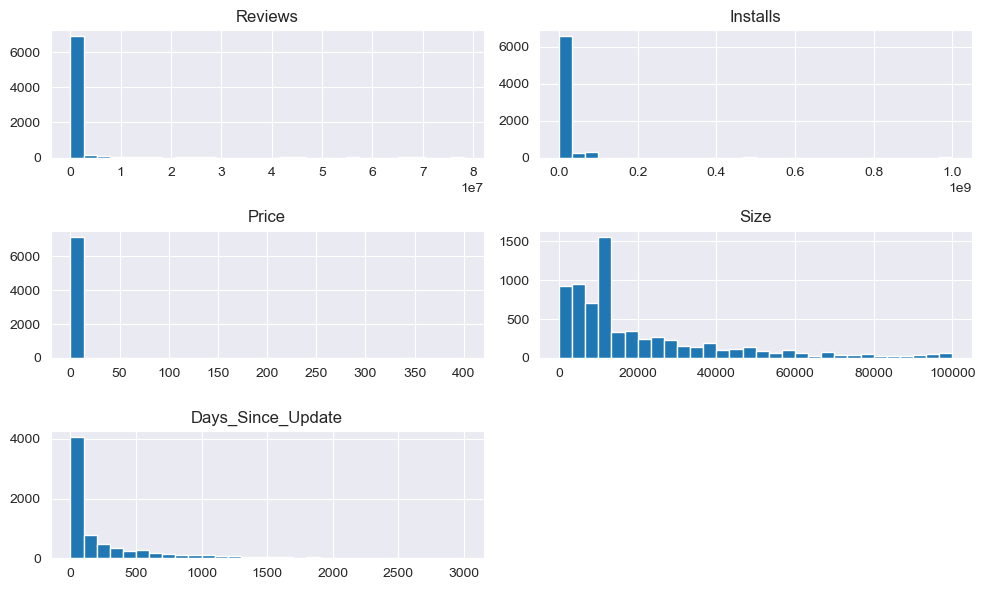

In [339]:

numeric_cols = ['Reviews', 'Installs', 'Price','Size', 'Days_Since_Update']
df[numeric_cols].hist(bins=30, figsize=(10, 6))  # Plot histograms
plt.tight_layout()
plt.show()


In [340]:

df['Reviews_log'] = np.log1p(df['Reviews'])      # np.log1p(x) = log(x + 1)
df['Installs_log'] = np.log1p(df['Installs'])
df['Price_log'] = np.log1p(df['Price'])
df['Days_Since_Update_log'] = np.log1p(df['Days_Since_Update'])


In [341]:
df['Size_log'] = np.log(df['Size'])

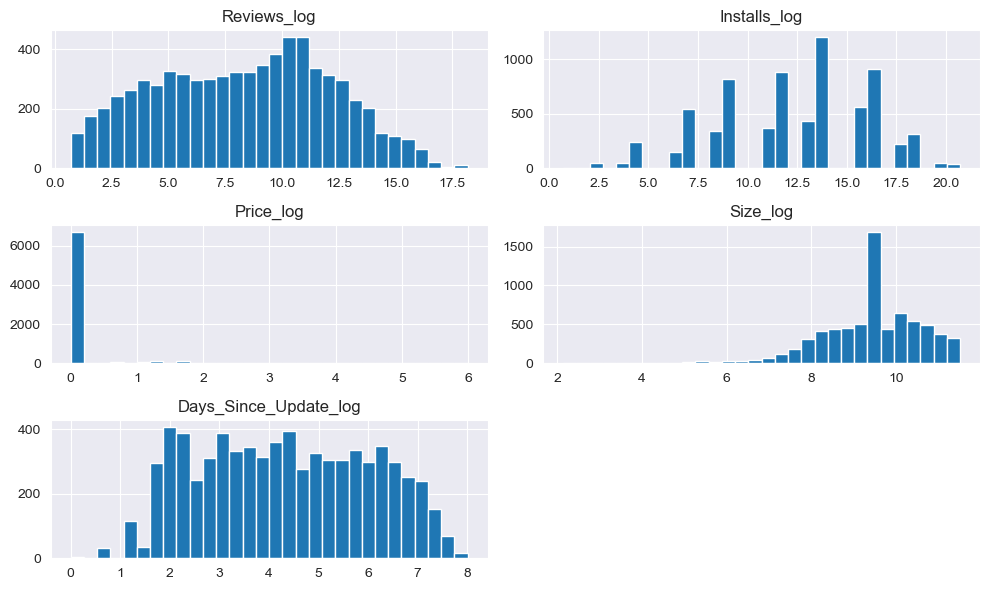

In [342]:
numeric_cols = ['Reviews_log', 'Installs_log', 'Price_log','Size_log', 'Days_Since_Update_log']
df[numeric_cols].hist(bins=30, figsize=(10, 6))  # Plot histograms
plt.tight_layout()
plt.show()

In [343]:
df['Is_Free'] = (df['Price'] == 0).astype(int)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8657
Columns: 107 entries, App Name to Is_Free
dtypes: float64(10), int64(93), object(4)
memory usage: 5.9+ MB


In [345]:
df['Content Rating'].unique()

array(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [346]:
rating_order = {
    'Everyone': 0,
    'Everyone 10+': 1,
    'Teen': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4,
    'Unrated': -1  # or 5, depending on your choice
}

df['ordinal_encoded'] = df['Content Rating'].map(rating_order)
print(df[['Content Rating', 'ordinal_encoded']])

     Content Rating  ordinal_encoded
0          Everyone                0
1          Everyone                0
2          Everyone                0
3          Everyone                0
4          Everyone                0
...             ...              ...
8651       Everyone                0
8652       Everyone                0
8654       Everyone                0
8655       Everyone                0
8657       Everyone                0

[7192 rows x 2 columns]


In [347]:
df_temp = df.copy()
df_temp.drop(columns=['App Name', 'Content Rating', 'Cat_Categorical','Genre'], inplace=True)

,Reviews,Size,Installs,Price,Y,Days_Since_Update,Is_Varies_Android,Is_Varies_Current,Current Version Num,Android Version Num,...,One_Hot_Cat_TRAVEL_AND_LOCAL,One_Hot_Cat_VIDEO_PLAYERS,One_Hot_Cat_WEATHER,Reviews_log,Installs_log,Price_log,Days_Since_Update_log,Size_log,Is_Free,ordinal_encoded
Reviews,1.000000,0.110382,0.602556,-0.009341,0.069742,-0.088772,0.144985,0.141390,-0.003947,-0.112769,...,-0.011772,0.005469,-0.008642,0.317003,0.280070,-0.036639,-0.145993,0.093738,0.042773,0.055522
Size,0.110382,1.000000,0.034534,-0.016115,0.065143,-0.186506,-0.156586,-0.153691,-0.018082,0.200871,...,-0.001530,-0.031524,-0.029494,0.261883,0.226108,-0.016663,-0.178437,0.802621,0.011321,0.162241
Installs,0.602556,0.034534,1.000000,-0.011148,0.050642,-0.103459,0.231709,0.224037,-0.003450,-0.182987,...,0.025226,0.031953,-0.011330,0.334149,0.350154,-0.044660,-0.182577,0.063106,0.051866,0.036995
Price,-0.009341,-0.016115,-0.011148,1.000000,-0.025599,0.004512,-0.017332,-0.018251,-0.001186,0.017430,...,-0.006843,-0.007101,-0.003572,-0.043586,-0.059993,0.567742,0.023956,-0.023907,-0.213948,-0.010911
Y,0.069742,0.065143,0.050642,-0.025599,1.000000,-0.139851,0.069540,0.065227,-0.003673,-0.028402,...,-0.037139,-0.036831,0.018155,0.220790,0.129436,0.020418,-0.180696,0.086115,-0.044166,0.017246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Price_log,-0.036639,-0.016663,-0.044660,0.567742,0.020418,0.129112,-0.027561,-0.030950,0.005024,-0.017917,...,-0.012497,-0.020951,0.000289,-0.154523,-0.233675,1.000000,0.129616,-0.063756,-0.860700,-0.027539
Days_Since_Update_log,-0.145993,-0.178437,-0.182577,0.023956,-0.180696,0.787815,-0.235472,-0.238417,-0.016363,-0.031292,...,-0.046089,-0.000684,-0.032071,-0.414258,-0.402078,0.129616,1.000000,-0.324909,-0.157658,-0.116724
Size_log,0.093738,0.802621,0.063106,-0.023907,0.086115,-0.381153,-0.002105,0.005575,-0.028600,0.143408,...,0.026577,-0.020175,-0.006896,0.324607,0.294898,-0.063756,-0.324909,1.000000,0.071621,0.168511
Is_Free,0.042773,0.011321,0.051866,-0.213948,-0.044166,-0.176943,0.031860,0.037352,-0.002496,0.029565,...,0.014098,0.020023,0.000221,0.181337,0.275060,-0.860700,-0.157658,0.071621,1.000000,0.037483


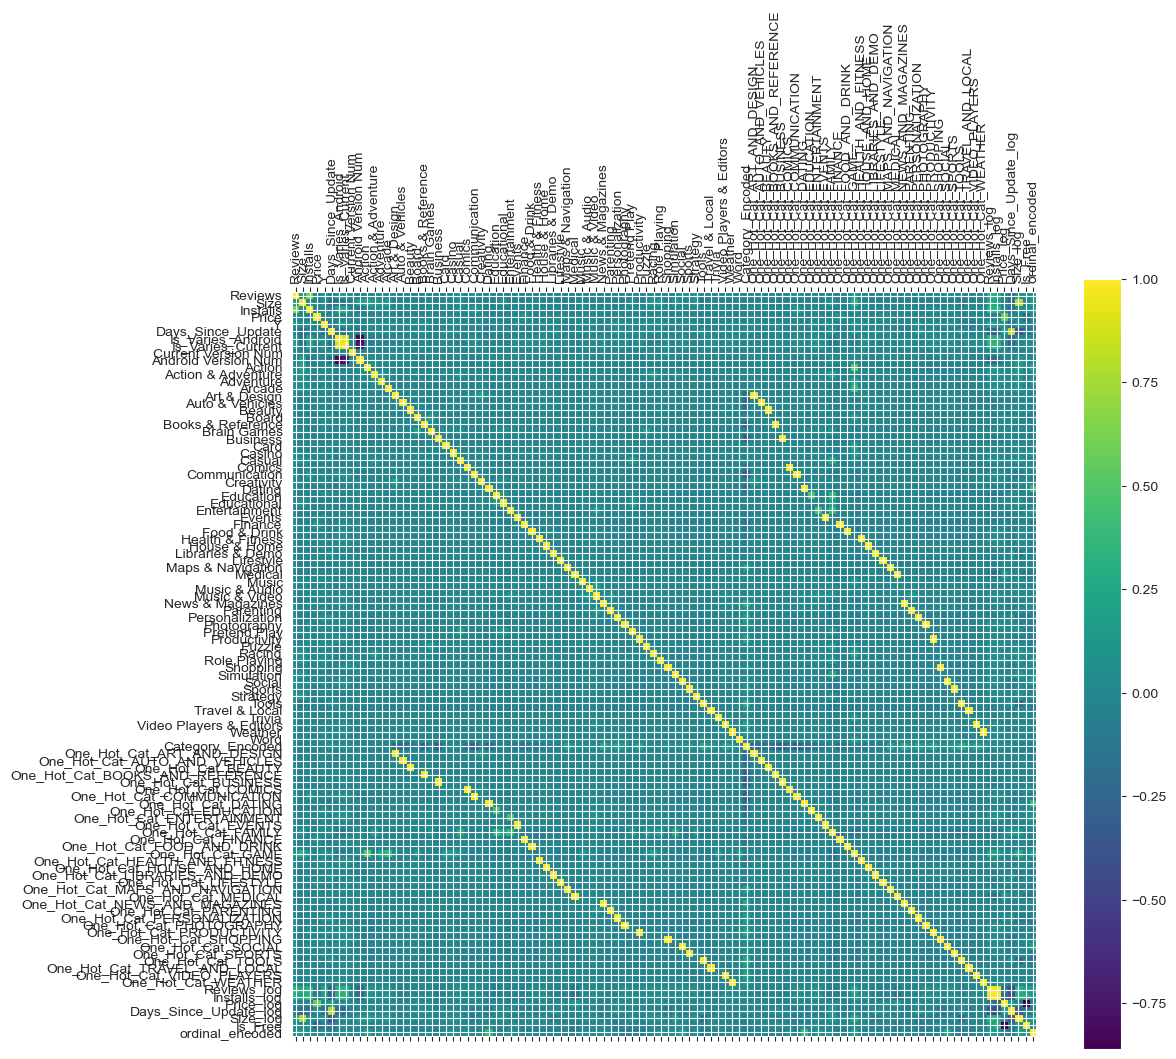

In [348]:
corr_matrix = df_temp.corr()
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr_matrix, cmap='viridis')
fig.colorbar(cax)

# Set up axes to show feature names
ticks = range(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
corr_matrix


In [349]:
from IPython.display import display

threshold = 0.88                     # change this if you wish

# absolute values of the correlations
corr_abs = corr_matrix.abs()

# keep only one copy of each pair (upper triangle, no diagonal)
mask  = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)
upper = corr_abs.where(mask)

# tidy DataFrame of pairs, sorted high → low
pairs_df = (
    upper.stack()
         .reset_index()
         .rename(columns={'level_0': 'feature_1',
                          'level_1': 'feature_2',
                          0: 'abs_corr'})
         .query('abs_corr >= @threshold')
         .sort_values('abs_corr', ascending=False)   # ← sorted here
         .reset_index(drop=True)
)

display(pairs_df)                   # nice HTML table in Jupyter



,feature_1,feature_2,abs_corr
0,Libraries & Demo,One_Hot_Cat_LIBRARIES_AND_DEMO,1.000000
1,Tools,One_Hot_Cat_TOOLS,1.000000
2,Photography,One_Hot_Cat_PHOTOGRAPHY,1.000000
3,Personalization,One_Hot_Cat_PERSONALIZATION,1.000000
4,Parenting,One_Hot_Cat_PARENTING,1.000000
5,News & Magazines,One_Hot_Cat_NEWS_AND_MAGAZINES,1.000000
6,Medical,One_Hot_Cat_MEDICAL,1.000000
7,Maps & Navigation,One_Hot_Cat_MAPS_AND_NAVIGATION,1.000000
8,Social,One_Hot_Cat_SOCIAL,1.000000
9,Weather,One_Hot_Cat_WEATHER,1.000000


consider removing (installs or reviews) and (is_varies_android or is_varies_current)

In [350]:
cols_to_drop = pairs_df['feature_2'].unique().tolist()
print(f"\nColumns to be dropped (feature_2 side of each pair):\n{cols_to_drop}")

# ── 3. drop them from your DataFrame  ────────────────────────────
df = df.drop(columns=cols_to_drop)     # use inplace=True if preferred
print(f"\nNew shape of df: {df.shape}")


Columns to be dropped (feature_2 side of each pair):
['One_Hot_Cat_LIBRARIES_AND_DEMO', 'One_Hot_Cat_TOOLS', 'One_Hot_Cat_PHOTOGRAPHY', 'One_Hot_Cat_PERSONALIZATION', 'One_Hot_Cat_PARENTING', 'One_Hot_Cat_NEWS_AND_MAGAZINES', 'One_Hot_Cat_MEDICAL', 'One_Hot_Cat_MAPS_AND_NAVIGATION', 'One_Hot_Cat_SOCIAL', 'One_Hot_Cat_WEATHER', 'One_Hot_Cat_HOUSE_AND_HOME', 'One_Hot_Cat_FOOD_AND_DRINK', 'One_Hot_Cat_SHOPPING', 'One_Hot_Cat_FINANCE', 'One_Hot_Cat_EVENTS', 'One_Hot_Cat_DATING', 'One_Hot_Cat_COMICS', 'One_Hot_Cat_BUSINESS', 'One_Hot_Cat_TRAVEL_AND_LOCAL', 'One_Hot_Cat_BEAUTY', 'One_Hot_Cat_AUTO_AND_VEHICLES', 'One_Hot_Cat_PRODUCTIVITY', 'One_Hot_Cat_COMMUNICATION', 'One_Hot_Cat_LIFESTYLE', 'One_Hot_Cat_HEALTH_AND_FITNESS', 'One_Hot_Cat_BOOKS_AND_REFERENCE', 'One_Hot_Cat_VIDEO_PLAYERS', 'One_Hot_Cat_SPORTS', 'One_Hot_Cat_ART_AND_DESIGN', 'Installs_log', 'Is_Varies_Current']

New shape of df: (7192, 77)


In [351]:
df['Content Rating'].unique()

array(['Everyone', 'Everyone 10+', 'Teen', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [352]:
rating_order = {
    'Everyone': 0,
    'Everyone 10+': 1,
    'Teen': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4,
    'Unrated': -1  # or 5, depending on how you want to treat "Unrated"
}

In [353]:
df['content_rating_ordinal'] = df['Content Rating'].map(rating_order)

In [354]:
df['content_rating_Categorical'] = df['Content Rating']

In [355]:
df = pd.get_dummies(df, columns=['Content Rating'], prefix='rating')

In [356]:
df_temp = df.copy()
df_temp.drop(columns=['App Name', 'content_rating_Categorical', 'Cat_Categorical','Genre'], inplace=True)

,Reviews,Size,Installs,Price,Y,Days_Since_Update,Is_Varies_Android,Current Version Num,Android Version Num,Action,...,Size_log,Is_Free,ordinal_encoded,content_rating_ordinal,rating_Adults only 18+,rating_Everyone,rating_Everyone 10+,rating_Mature 17+,rating_Teen,rating_Unrated
Reviews,1.000000,0.110382,0.602556,-0.009341,0.069742,-0.088772,0.144985,-0.003947,-0.112769,0.031999,...,0.093738,0.042773,0.055522,0.055522,-0.003156,-0.081785,0.081639,-0.005942,0.056661,-0.001926
Size,0.110382,1.000000,0.034534,-0.016115,0.065143,-0.186506,-0.156586,-0.018082,0.200871,0.265143,...,0.802621,0.011321,0.162241,0.162241,-0.001564,-0.201545,0.142179,0.033169,0.144302,-0.007921
Installs,0.602556,0.034534,1.000000,-0.011148,0.050642,-0.103459,0.231709,-0.003450,-0.182987,0.020778,...,0.063106,0.051866,0.036995,0.036995,-0.003784,-0.050354,0.027572,-0.013155,0.055376,-0.002267
Price,-0.009341,-0.016115,-0.011148,1.000000,-0.025599,0.004512,-0.017332,-0.001186,0.017430,-0.008450,...,-0.023907,-0.213948,-0.010911,-0.010911,-0.001184,0.010913,-0.005938,-0.008860,-0.004112,-0.000684
Y,0.069742,0.065143,0.050642,-0.025599,1.000000,-0.139851,0.069540,-0.003673,-0.028402,0.045784,...,0.086115,-0.044166,0.017246,0.017246,0.004540,-0.030987,0.031401,-0.018744,0.031755,-0.001873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rating_Everyone,-0.081785,-0.201545,-0.050354,0.010913,-0.030987,0.071586,-0.024983,-0.000917,0.022830,-0.260682,...,-0.200261,-0.030901,-0.938580,-0.938580,-0.040286,1.000000,-0.407859,-0.437941,-0.714254,-0.023256
rating_Everyone 10+,0.081639,0.142179,0.027572,-0.005938,0.031401,-0.023238,-0.000777,0.009510,0.004635,0.107316,...,0.129576,-0.016161,0.138486,0.138486,-0.004225,-0.407859,1.000000,-0.045927,-0.074904,-0.002439
rating_Mature 17+,-0.005942,0.033169,-0.013155,-0.008860,-0.018744,-0.054469,0.022956,-0.008433,-0.009949,0.088106,...,0.051749,0.021139,0.657476,0.657476,-0.004536,-0.437941,-0.045927,1.000000,-0.080428,-0.002619
rating_Teen,0.056661,0.144302,0.055376,-0.004112,0.031755,-0.041286,0.016186,0.000898,-0.024229,0.204056,...,0.137931,0.034496,0.657410,0.657410,-0.007399,-0.714254,-0.074904,-0.080428,1.000000,-0.004271


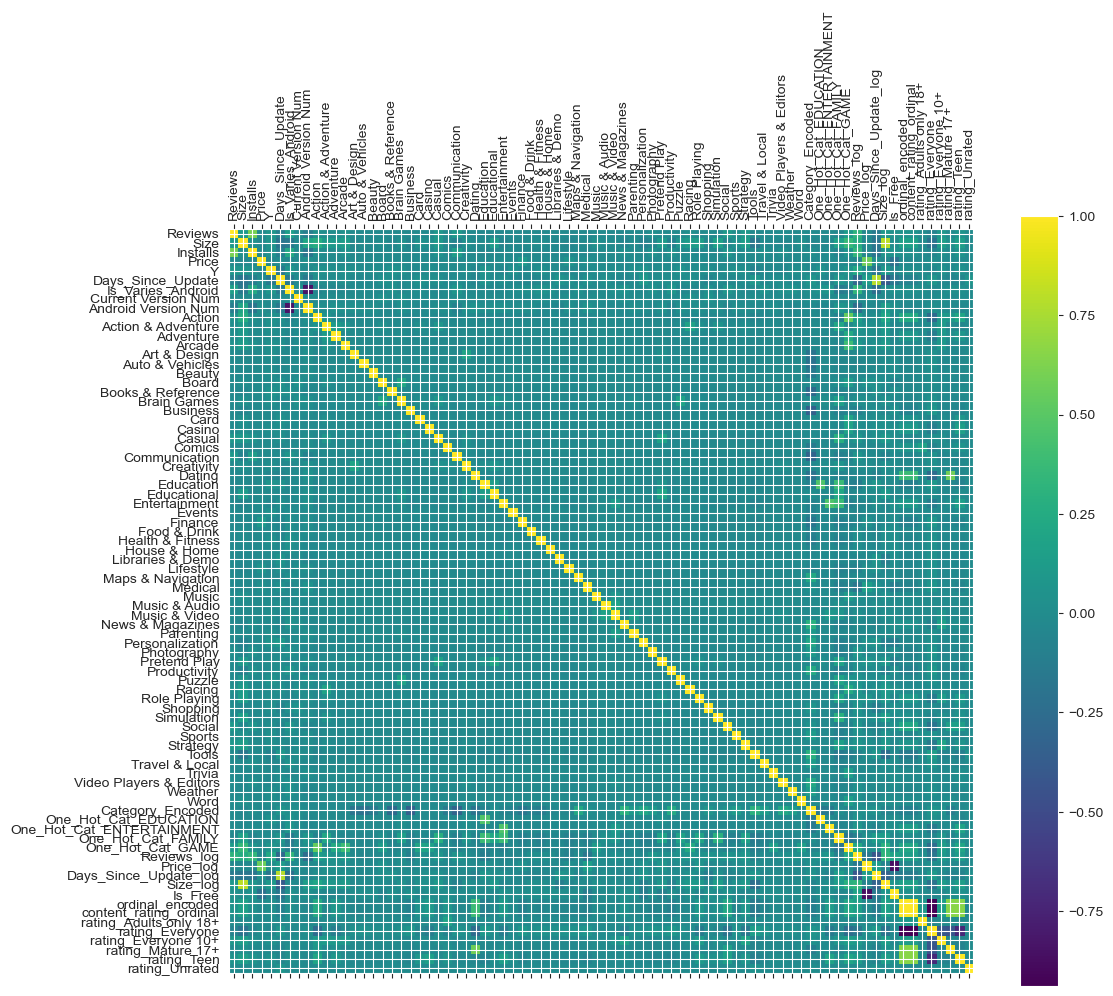

In [357]:
corr_matrix = df_temp.corr()
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr_matrix, cmap='viridis')
fig.colorbar(cax)

# Set up axes to show feature names
ticks = range(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
corr_matrix

In [358]:
df

,App Name,Reviews,Size,Installs,Price,Genre,Y,Days_Since_Update,Is_Varies_Android,Current Version Num,...,Is_Free,ordinal_encoded,content_rating_ordinal,content_rating_Categorical,rating_Adults only 18+,rating_Everyone,rating_Everyone 10+,rating_Mature 17+,rating_Teen,rating_Unrated
0,Coloring book moana,967,14000.0,500000,0.0,Art & Design;Pretend Play,3.9,205,0,2.000000,...,1,0,0,Everyone,False,True,False,False,False,False
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,8700.0,5000000,0.0,Art & Design,4.7,7,0,1.020400,...,1,0,0,Everyone,False,True,False,False,False,False
2,Pixel Draw - Number Art Coloring Book,967,2800.0,100000,0.0,Art & Design;Creativity,4.3,49,0,1.010000,...,1,0,0,Everyone,False,True,False,False,False,False
3,Paper flowers instructions,167,5600.0,50000,0.0,Art & Design,4.4,500,0,1.000000,...,1,0,0,Everyone,False,True,False,False,False,False
4,Smoke Effect Photo Maker - Smoke Editor,178,19000.0,50000,0.0,Art & Design,3.8,104,0,1.010000,...,1,0,0,Everyone,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,Chemin (fr),44,619.0,1000,0.0,Books & Reference,4.8,1599,0,0.080000,...,1,0,0,Everyone,False,True,False,False,False,False
8652,FR Calculator,7,2600.0,500,0.0,Education,4.0,416,0,1.000000,...,1,0,0,Everyone,False,True,False,False,False,False
8654,Sya9a Maroc - FR,38,53000.0,5000,0.0,Education,4.5,379,0,1.480000,...,1,0,0,Everyone,False,True,False,False,False,False
8655,Fr. Mike Schmitz Audio Teachings,4,3600.0,100,0.0,Education,5.0,33,0,1.000000,...,1,0,0,Everyone,False,True,False,False,False,False
